## Imports

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#import seaborn as sns
import datetime
import glob
import os
os.chdir("\data")

#### Merge range of 12 months (05/2020 - 04/2021)

In [3]:
     
#C:\Users\hamdy\OneDrive\Dokumente\Projects\Google_Data_Analytics_Cert\Capstone\data
  
csv_dir = r"C:\Users\hamdy\OneDrive\Dokumente\Projects\Google_Data_Analytics_Cert\Capstone\data"
csv_files = glob.glob(f"{csv_dir}\*.csv")

combined_csv = pd.concat([pd.read_csv(f) for f in csv_files])
combined_csv.head()


<ipython-input-3-114bd4db906d>:6: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  combined_csv = pd.concat([pd.read_csv(f) for f in csv_files])


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member


## Cleaning the data

In [4]:
#combined_csv.info()
df = combined_csv.dropna(subset=['ride_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8920302 entries, 0 to 4460150
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 952.8+ MB


## 1. How do annual members and casual riders use Cyclistic bikes differently?

possible findings:
- compare in which months there were more annual members than casuals riding bikes 
- compare the amount of riders per day on every weekday
- average duration of trip (per day/per month)


In [5]:
# cut time to daytime and date
df['started_at'].astype('string')
df['ended_at'].astype('string')
# daytime = df['started_at'].str.split(" ", n = 1, expand=True)
# end_time = df['ended_at'].str.split(" ", n = 1, expand=True)

# df['time_start'] = daytime[1]
# df['start_date'] = daytime[0]

# df['time_end'] = end_time[1]
# df['end_date'] = end_time[0]



df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member


In [6]:
# format start_date to datetime
df['start_date'] = pd.to_datetime(df['started_at'], errors='coerce')
df['end_date'] = pd.to_datetime(df['ended_at'], errors='coerce')
# df['time_start'] = pd.to_datetime(df['time_start'], errors='coerce')
# df['time_end'] = pd.to_datetime(df['time_end'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8920302 entries, 0 to 4460150
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          object        
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_date          datetime64[ns]
 14  end_date            datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 1.1+ GB


In [7]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member,2020-07-09 15:22:02,2020-07-09 15:25:52
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member,2020-07-24 23:56:30,2020-07-25 00:20:17
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual,2020-07-08 19:49:07,2020-07-08 19:56:22
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual,2020-07-17 19:06:42,2020-07-17 19:27:38
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member,2020-07-04 10:39:57,2020-07-04 10:45:05


Create new column trip duration

In [8]:
df['trip_duration']= df['end_date']-df['start_date']
df['day_of_ride'] = df['start_date'].dt.day
df['month_of_ride'] = df['start_date'].dt.month
df['year_of_ride'] = df['start_date'].dt.year

df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,trip_duration,day_of_ride,month_of_ride,year_of_ride
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member,2020-07-09 15:22:02,2020-07-09 15:25:52,0 days 00:03:50,9,7,2020
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member,2020-07-24 23:56:30,2020-07-25 00:20:17,0 days 00:23:47,24,7,2020
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual,2020-07-08 19:49:07,2020-07-08 19:56:22,0 days 00:07:15,8,7,2020
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual,2020-07-17 19:06:42,2020-07-17 19:27:38,0 days 00:20:56,17,7,2020
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member,2020-07-04 10:39:57,2020-07-04 10:45:05,0 days 00:05:08,4,7,2020


1.1 Compare in which months there were more annual members than casuals riding bikes 

In [9]:
df['count'] = 1
#monthly_rides = df.groupby(['month_of_ride', 'member_casual']).size()
monthly_rides=df.groupby(['month_of_ride', 'member_casual']).sum().reset_index()[['month_of_ride','member_casual', 'count']]
monthly_rides

,month_of_ride,member_casual,count
0,1,casual,36234
1,1,member,157434
2,2,casual,20262
3,2,member,78982
4,3,casual,168066
5,3,member,288926
6,4,casual,273202
7,4,member,401258
8,5,casual,513832
9,5,member,549434


member_casual
casual    AxesSubplot(0.125,0.536818;0.775x0.343182)
member    AxesSubplot(0.125,0.536818;0.775x0.343182)
dtype: object

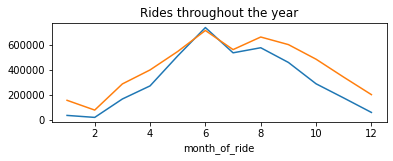

In [10]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(2, 2, (1,2))
ax1.set_title("Rides throughout the year")

# Divide the figure into a 1x2 grid, and give me the second section
#ax2 = fig.add_subplot(223)

monthly_rides.groupby('member_casual').plot(x='month_of_ride', y='count', ax=ax1, legend=False)
#monthly_rides.groupby('month_of_ride')['count'].mean().plot(kind='barh', ax=ax2)

1.1 Findings: We can see that rides from casuals exceed member rides in June. Furthermore the gap of rides between casuals and members is especially close over the summer months and is larger during winter.

1.2 Compare the amount of riders per day on every weekday

In [11]:
#make a column with weekdays
df['day_of_week'] = df['start_date'].dt.day_name()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,start_date,end_date,trip_duration,day_of_ride,month_of_ride,year_of_ride,count,day_of_week
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,...,-87.634830,member,2020-07-09 15:22:02,2020-07-09 15:25:52,0 days 00:03:50,9,7,2020,1,Thursday
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,...,-87.660274,member,2020-07-24 23:56:30,2020-07-25 00:20:17,0 days 00:23:47,24,7,2020,1,Friday
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,...,-87.647539,casual,2020-07-08 19:49:07,2020-07-08 19:56:22,0 days 00:07:15,8,7,2020,1,Wednesday
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,...,-87.636282,casual,2020-07-17 19:06:42,2020-07-17 19:27:38,0 days 00:20:56,17,7,2020,1,Friday
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,...,-87.631501,member,2020-07-04 10:39:57,2020-07-04 10:45:05,0 days 00:05:08,4,7,2020,1,Saturday


In [12]:
weekday_rides=df.groupby(['day_of_week', 'member_casual']).sum().reset_index()[['day_of_week','member_casual', 'count']]
weekday_rides

,day_of_week,member_casual,count
0,Friday,casual,562376
1,Friday,member,750114
2,Monday,casual,418782
3,Monday,member,675008
4,Saturday,casual,879420
5,Saturday,member,753808
6,Sunday,casual,733186
7,Sunday,member,646840
8,Thursday,casual,425058
9,Thursday,member,727784


member_casual
casual    AxesSubplot(0.125,0.536818;0.775x0.343182)
member    AxesSubplot(0.125,0.536818;0.775x0.343182)
dtype: object

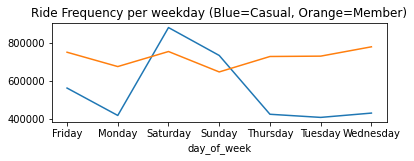

In [13]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(2, 2, (1,2))
ax1.set_title("Ride Frequency per weekday (Blue=Casual, Orange=Member)")

# Divide the figure into a 1x2 grid, and give me the second section
#ax2 = fig.add_subplot(223)

weekday_rides.groupby('member_casual').plot(x='day_of_week', y='count', ax=ax1, stacked=True, legend=False)

1.2 Findings: It can be observed, that bike rides by casual riders spike are the highest on Saturday, followed by Sunday and Friday. This could possible indicate that casual riders most often take bikes on weekenddays for freetime activities, meaning they commute in a different way throughout the usual workdays in a week. The ride frquency by members is relatively stable throughout the week, with a low on Sundays. This could indicate, that the bike is a staple in their commute throughout the week.

1.3 Average duration per trip

In [17]:
duration = df.groupby('member_casual')['trip_duration'].mean()
duration

member_casual
casual   0 days 00:39:40.169177310
member   0 days 00:11:43.510122362
Name: trip_duration, dtype: timedelta64[ns]

1.3 Findings: According to the calcualted numbers, throughout the whole year of data, the average duration of trips for members was roughly 12min while casuals drove for almost 40mins. This could lead to the assumotion, that members use the bikerides for trips for example to work that take too long to walk but too short to drive. Casuals drive longer, leading to an hypothesis of casuals using bikes for emergencies or as a substitute to their normal transportation.


## 2.  Why would casual riders buy Cyclistic annual memberships

## 3. How can Cyclistic use digital media to influence casual riders to become members?